# Searching for Superior Scotch

My mission for this project is to:
A. Clean a dataset

B. Perform exploratory data analysis:

    the distribution of review scores, 
    the descriptive statistics of prices per review score,
    identify the scotch whiskys with the highest review scores
C. Answer a few questions:

    1. How do the 3 scotch categories perform according to review scores?
    2. Which category is produced and sold in the greatest quantity?
    3. Which scotches provide the best overall value?
    4. My friend was upset that a particular bottle wasn't in the best values list, so why not?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scotch = pd.read_csv('scotch_reviews_2020.csv')

# View the data

In [3]:
scotch.info()
scotch.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2247 non-null   int64 
 1   name                 2247 non-null   object
 2   category             2247 non-null   object
 3   review.point         2247 non-null   int64 
 4   price                2247 non-null   object
 5   currency             2247 non-null   object
 6   description.1.2247.  2208 non-null   object
dtypes: int64(2), object(5)
memory usage: 123.0+ KB


,id,name,category,review.point,price,currency,description.1.2247.
0,1,"Black Bowmore 42 year old 1964 vintage, 40.5%",Single Malt Scotch,97,4500,$,What impresses me most is how this whisky evol...
1,2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,$,There have been some legendary Bowmores from t...
2,3,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
3,4,"Glenlivet Cellar Collection 1969 vintage, 50.8%",Single Malt Scotch,96,750,$,It’s great that Glenlivet releases whiskies un...
4,5,The Macallan 29 year old 1976 Vintage (Cask #1...,Single Malt Scotch,96,"1,500",$,Classic sherry cask-aged Macallan. Antique amb...


## Clean the data 

Rename weird columns, and check to see if currency is all in $. If so, I'll change the name of the price column and drop the currency column...

In [4]:
scotch['currency'].unique()

array(['$'], dtype=object)

In [5]:
scotch['currency'].nunique()

1

In [7]:
scotch.rename(columns={'review.point': 'points', 
                       'price': 'USD', 
                       'description.1.2247.': 'review'}, inplace=True)
scotch.drop('currency', axis=1, inplace=True)

In [8]:
scotch['USD'] = pd.to_numeric(scotch['USD'], errors='coerce')
scotch['USD'].isna().sum()

116

In [9]:
scotch.dropna(subset='USD', inplace=True)
scotch['USD'].isna().sum()

0

In [10]:
scotch['USD'] = scotch['USD'].astype(int)

# Check for duplicate rows

In [11]:
scotch.duplicated(subset='name').sum()

59

In [12]:
scotch.drop_duplicates(subset='name', keep='first', inplace=True)
scotch.duplicated(subset='name').sum()

0

In [13]:
scotch.info()
scotch.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 2246
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2072 non-null   int64 
 1   name      2072 non-null   object
 2   category  2072 non-null   object
 3   points    2072 non-null   int64 
 4   USD       2072 non-null   int32 
 5   review    2037 non-null   object
dtypes: int32(1), int64(2), object(3)
memory usage: 105.2+ KB


,id,name,category,points,USD,review
0,1,"Black Bowmore 42 year old 1964 vintage, 40.5%",Single Malt Scotch,97,4500,What impresses me most is how this whisky evol...
1,2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,There have been some legendary Bowmores from t...
2,3,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, ..."
3,4,"Glenlivet Cellar Collection 1969 vintage, 50.8%",Single Malt Scotch,96,750,It’s great that Glenlivet releases whiskies un...
6,7,"Gold Bowmore 1964 vintage, 42.4%",Single Malt Scotch,96,6250,Deep gold color. Surprisingly lively on the no...
7,8,"Bowmore 40 year old, 44.8%",Single Malt Scotch,96,11000,"Definitely showing its age, but not in a bad w..."
8,9,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,With a name inspired by a 1926 Buster Keaton m...
10,11,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,"Captivating, enticing, and wonderfully charmin..."
11,12,"Chivas, 18 year old, 40%",Blended Scotch Whisky,95,70,An essay in balance on both the aroma and pala...
12,13,"Johnnie Walker Blue Anniversary, 60%",Blended Scotch Whisky,95,3500,Formulated to celebrate the 200th anniversary ...


In [14]:
scotch.describe()

,id,points,USD
count,2072.000000,2072.000000,2072.000000
mean,1152.914575,88.338320,361.391892
std,639.771280,2.890555,3617.160759
min,1.000000,83.000000,10.000000
25%,606.750000,86.000000,68.000000
50%,1166.500000,88.000000,110.000000
75%,1703.250000,90.000000,200.000000
max,2247.000000,97.000000,157000.000000


## I'll look at the review points distribution.

In [15]:
scotch['points'].value_counts()

points
88    261
87    257
89    237
90    230
86    212
85    196
84    154
91    148
92    144
93    100
94     57
83     43
95     25
96      5
97      3
Name: count, dtype: int64

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


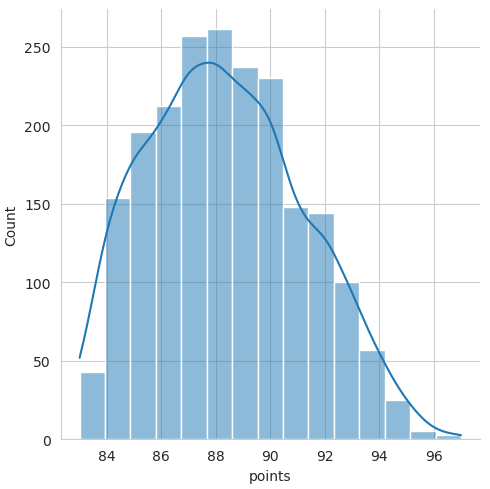

In [16]:
with sns.axes_style(style='whitegrid'):
    f = sns.displot(data=scotch, x='points', kde=True, bins=15)

## Descriptive statistics on prices per point rating.

In [17]:
scotch.groupby('points')['USD'].describe()

,count,mean,std,min,25%,50%,75%,max
points,,,,,,,,
83,43.0,136.023256,145.113008,30.0,67.50,90.0,157.50,900.0
84,154.0,124.285714,184.702471,13.0,63.50,80.0,124.50,1900.0
85,196.0,140.183673,250.798186,10.0,60.00,84.0,133.00,3000.0
86,212.0,140.867925,173.261278,20.0,61.50,95.0,130.00,1250.0
87,257.0,204.762646,949.631776,16.0,59.00,80.0,140.00,14999.0
88,261.0,178.969349,318.646065,13.0,65.00,100.0,160.00,3378.0
89,237.0,228.257384,623.441342,25.0,70.00,114.0,181.00,7000.0
90,230.0,221.595652,300.359678,22.0,70.00,120.0,249.00,2500.0
91,148.0,497.513514,2058.325138,35.0,100.00,151.0,335.00,23427.0


### Note from table above: There is a 97 reviewed whisky for 225 USD. Considering there are bottles for magnitude orders more, 225 USD is relatively inexpensive for such a great rating. Maybe I'll try to find out what it is...

In [18]:
scotch.query("points == 97")

,id,name,category,points,USD,review
0,1,"Black Bowmore 42 year old 1964 vintage, 40.5%",Single Malt Scotch,97,4500,What impresses me most is how this whisky evol...
1,2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,There have been some legendary Bowmores from t...
2,3,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, ..."


## Now I'll try to put prices into bins, and sort the dataframe by points and price bins...

In [19]:
price_bins = pd.qcut(scotch['USD'], 7, precision=0)
scotch.groupby(['points', price_bins])['name'].count().unstack()

C:\Users\david\AppData\Local\Temp\ipykernel_20876\1288445346.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scotch.groupby(['points', price_bins])['name'].count().unstack()


USD,"(9.0, 55.0]","(55.0, 72.0]","(72.0, 96.0]","(96.0, 125.0]","(125.0, 175.0]","(175.0, 350.0]","(350.0, 157000.0]"
points,,,,,,,
83,9,5,10,5,6,6,2
84,29,29,38,22,18,11,7
85,46,33,36,26,28,14,13
86,43,31,34,43,31,12,18
87,60,45,41,29,31,30,21
88,41,43,44,39,35,33,26
89,35,25,30,44,41,40,22
90,27,33,21,40,26,48,35
91,11,11,14,21,27,31,33


# Analysis

Question 1: How do the categories stack up against each other?

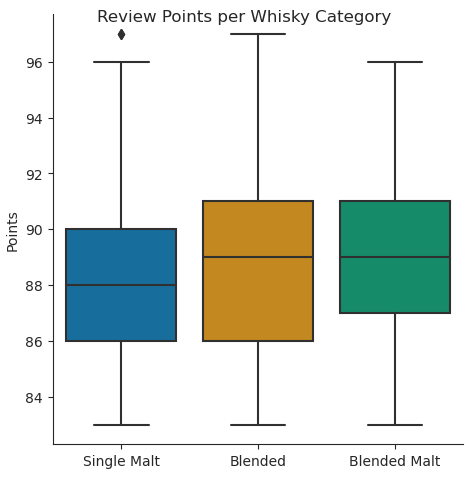

In [20]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data=scotch, x='category', y='points', kind='box', palette='colorblind', legend=False)
    g.set_axis_labels('', 'Points')
    g.set_xticklabels(['Single Malt', 'Blended', 'Blended Malt'])
    g.fig.suptitle('Review Points per Whisky Category')
plt.show()

### Question 2: What types of whisky are being sold?

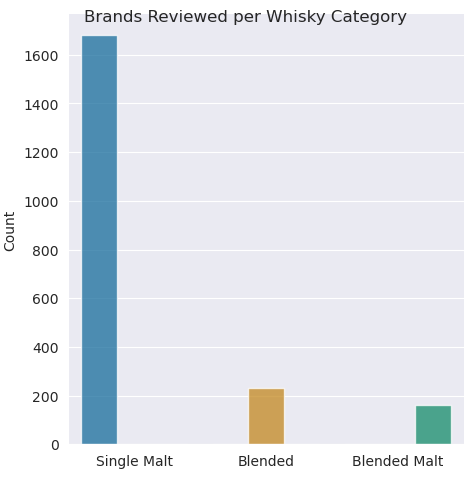

In [21]:
with sns.axes_style('darkgrid'):
    h = sns.catplot(data=scotch, x='category', kind='count', hue='category', palette='colorblind', alpha=0.75, legend=False)
    h.set_axis_labels('', 'Count')
    h.set_xticklabels(['Single Malt', 'Blended', 'Blended Malt'])
    h.fig.suptitle('Brands Reviewed per Whisky Category')
plt.show()

### Question 3: Now, I want to determine which scotches have the best value. First, I'll filter brands that fit into a particular price and rating range (which I just made up myself, no science involved). I want bottles that are less than or equal to 125 and a rating of 93 or higher...

In [22]:
scotch_filter = scotch.query("USD <= 125 & points >= 93")
scotch_filter.info()
scotch_filter

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 11 to 234
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46 non-null     int64 
 1   name      46 non-null     object
 2   category  46 non-null     object
 3   points    46 non-null     int64 
 4   USD       46 non-null     int32 
 5   review    45 non-null     object
dtypes: int32(1), int64(2), object(3)
memory usage: 2.3+ KB


,id,name,category,points,USD,review
11,12,"Chivas, 18 year old, 40%",Blended Scotch Whisky,95,70,An essay in balance on both the aroma and pala...
26,27,Compass Box Flaming Heart (10th Anniversary bo...,Blended Malt Scotch Whisky,95,105,"A marriage of three different single malts, ag..."
31,32,Compass Box The Peat Monster 10th Anniversary ...,Blended Scotch Whisky,95,120,"As you’d expect, solid peat is the first thing..."
34,35,"Ardbeg Corryvreckan, 57.1%",Single Malt Scotch,95,90,"Part of the permanent Ardbeg range since 2008,..."
51,52,"The Macallan 17 year old Fine Oak, 43%",Single Malt Scotch,94,120,Another of the Fine Oak series (aged in both b...
54,55,"The Antiquary, 21 year old, 43%",Blended Scotch Whisky,94,100,"Drier than the 12 year old (reviewed below), w..."
59,60,"Compass Box The Peat Monster, 46%",Blended Malt Scotch Whisky,94,65,The formula for this whisky has changed slight...
60,61,"Laphroaig Triple Wood, 48%",Single Malt Scotch,94,100,This is the first time I’ve been up for review...
63,64,Lagavulin 12 year old (Diageo Special Releases...,Single Malt Scotch,94,109,There’s precious little reticence about this b...
65,66,"Highland Park 18 year old, 43%",Single Malt Scotch,94,112,Introduced to the Highland Park portfolio in 1...


In [23]:
scotch_filter['USD'].agg(['max', 'min'])

max    120
min     34
Name: USD, dtype: int64

## Now I will normalize "value" by dividing the price column by the points column. This should provide a relative value per bottle of scotch...

In [24]:
scotch['price_per_point'] = (scotch['USD'] / scotch['points']).round(2)
scotch.info()
scotch.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 2246
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2072 non-null   int64  
 1   name             2072 non-null   object 
 2   category         2072 non-null   object 
 3   points           2072 non-null   int64  
 4   USD              2072 non-null   int32  
 5   review           2037 non-null   object 
 6   price_per_point  2072 non-null   float64
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 185.9+ KB


,id,name,category,points,USD,review,price_per_point
0,1,"Black Bowmore 42 year old 1964 vintage, 40.5%",Single Malt Scotch,97,4500,What impresses me most is how this whisky evol...,46.39
1,2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,There have been some legendary Bowmores from t...,139.18
2,3,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, ...",2.32
3,4,"Glenlivet Cellar Collection 1969 vintage, 50.8%",Single Malt Scotch,96,750,It’s great that Glenlivet releases whiskies un...,7.81
6,7,"Gold Bowmore 1964 vintage, 42.4%",Single Malt Scotch,96,6250,Deep gold color. Surprisingly lively on the no...,65.10


## Now I'll sort by the best value. And I will make a new dataframe with only ratings above 92...

In [25]:
above_92 = scotch[scotch['points'] > 92]
above_92.sort_values('price_per_point')

,id,name,category,points,USD,review,price_per_point
110,111,"Black Bottle, 10 year old, 43%",Blended Scotch Whisky,93,34,\r\n\r\nBenriach is a sleeper of a single malt...,0.37
224,225,"Compass Box Great King Street Glasgow Blend, 43%",Blended Scotch Whisky,93,40,Aged in newly toasted first-fill Pedro Ximénez...,0.43
109,110,"Ardbeg 5 year old Wee Beastie, 47.4%",Single Malt Scotch,94,47,"\r\n\r\nSpirit, not cask, drives this whisky’s...",0.50
153,154,"Compass Box Oak Cross, 46%",Blended Malt Scotch Whisky,93,50,Bright gold. Amazingly fresh fruits and quince...,0.54
194,195,"Buchanan’s Select 15 year old, 40%",Blended Malt Scotch Whisky,93,50,A triumphant expression including whisky disti...,0.54
...,...,...,...,...,...,...,...
7,8,"Bowmore 40 year old, 44.8%",Single Malt Scotch,96,11000,"Definitely showing its age, but not in a bad w...",114.58
70,71,"Brora 40 year old Single Cask 1972 Vintage, 59.1%",Single Malt Scotch,94,11824,Just 160 bottles of 1972 Brora are available t...,125.79
1,2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,There have been some legendary Bowmores from t...,139.18
29,30,"Bowmore 50 year old (distilled 1961), 40.7%",Single Malt Scotch,95,26650,"The whisky is sensational, a glorious mix of g...",280.53


## Question 4: My friend asked specifically about the Macallan 12 year and Macallan 18 year scotch whiskys so I subsetted for those...

In [26]:
scotch[scotch['name'].str.contains('acallan') & scotch['name'].str.contains('12|18')]

,id,name,category,points,USD,review,price_per_point
336,337,The Macallan 18 year old Sherry Oak (2017 Edit...,Single Malt Scotch,92,294,This was initially matured in American oak bou...,3.20
362,363,Macallan 18 year old Sherry Oak (2018 Edition)...,Single Malt Scotch,92,320,Terroir and provenance are keenly debated in m...,3.48
389,390,"Macallan 18 year old Double Cask, 43%",Single Malt Scotch,92,330,This expression was distilled from malt peated...,3.59
436,437,"The Macallan 18 year old Sherry Oak, 43%",Single Malt Scotch,91,118,One of the finest Balvenie 15 year olds I’ve t...,1.30
598,599,"The Macallan 1861 Replica, 42.7%",Single Malt Scotch,90,180,Independent bottlings of Cragganmore are hard ...,2.00
706,707,"The Macallan 12 year old Double Cask, 40%",Single Malt Scotch,90,65,A fantastically earthy whisky bristling with r...,0.72
775,776,"Macallan 12 year old Double Cask, 43%",Single Malt Scotch,90,65,The nose offers rubbery-sweet peat and an arra...,0.72
1290,1291,"Macallan 12 year old Triple Cask, 40%",Single Malt Scotch,88,65,"Lighter in character than the 50 year old, bat...",0.74
1590,1591,"Macallan 12 year old Sherry Oak, 43%",Single Malt Scotch,87,70,Part of the Jura range exhibiting ‘sweetness a...,0.80


# Results
Question 1. How do the 3 scotch categories perform according to review scores?

Answer: According to the boxplot provided above, it appears that the Blended Malt performed the best, as 50% of the reviews were between 87 and 91. This category has the narrowest distribution of scores. Single Malt and Blended Scotch each have one and/or two 97 scores, but Single Malt has a lower central tendency, and Blended Scotch has greater dispersion of values. Therefore, I crown the title of Best Category to Blended Malt.

Question 2. Which category is produced and sold in the greatest quantity?

Answer: According to the bar plot provided above, single malt scotches are produced in much greater magnitude. Or more accurately, perhaps I should say that single malt whiskys were reviewed much more inside this dataset. Actual production volume and sales could only be inferred from this particular dataset.

Question 3. Which scotches provide the best overall value?

Answer: I approached this question two different ways. The first was just by creating aribtrary values on which to filter the dataset. I wanted to return only bottles that fit two criteria: priced at 125 or less, and rated as 93 or higher. The resulting dataframe returned sorted by review score in descending order. So a user could browse through this dataframe in order to pick the appropriate aperitif. The second method provided a little more direction. I created a new column in the dataframe with the calculation of points / price, in order to normalize 'value'. So the lower the better in this formula, which is how I sorted the dataframe. So a user can now view this dataframe, and if they want the best whisky for their money, then its the Black Bottle 10 year. I'll be on the lookout for that myself.

Question 4. My friend was upset that a particular bottle wasn't in the best values list, so why not?

Answer: I sent this scotch analysis to my friend, desperately hoping for the positive affirmation my self esteem needs. Almost immediately, he asks in an accusatory tone why his two favorite scotches aren't in the file I sent him. His two favorites are Macallan 12 year, and Macallan 18 year. So I searched for them in the original database, and sadly for my friend, those two have ratings between 87 and 92, and since I filtered for any ratings 93 and above, they just missed the cut. And some of them are much more expensive than 125. Sorry bro.

# Sources
https://www.kaggle.com/code/neilcosgrove/scotch-whisky-analysis

https://www.kaggle.com/code/fidelissauro/whiskys-common-sense-questions-analysis

https://www.kaggle.com/code/idcargill/linear-regression/notebook

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html#pandas.DataFrame.astype

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html